In [1]:
from pathlib import Path

import anndata as ad
from IPython.core.interactiveshell import InteractiveShell

import importlib
import subcluster
importlib.reload(subcluster)

from subcluster import (
    ClusteringResult,
    ClusteringResultManager,
    plot_clustering_heatmap_2,
    run_clustering,
    update_geojson_from_clustering_result,
)

InteractiveShell.ast_node_interactivity = "all"


# Demo Data


In [2]:
adata = ad.read_h5ad("input/data_demo.h5ad")[0:1000].copy()
adata

AnnData object with n_obs × n_vars = 1000 × 46
    obs: 'id', 'cellLabel', 'cellSize', 'Y_cent', 'X_cent', 'tma'

In [3]:
# single cell data
adata.X
adata.to_df().head()

array([[3.36001928e-01, 8.51124647e-02, 3.07375298e-01, ...,
        1.95495360e-03, 0.00000000e+00, 9.63720695e-04],
       [2.46858923e-01, 4.89802643e-04, 0.00000000e+00, ...,
        2.26652879e-03, 0.00000000e+00, 1.30542269e-03],
       [0.00000000e+00, 4.89802643e-04, 8.35764486e-04, ...,
        2.26652879e-03, 0.00000000e+00, 1.30542269e-03],
       ...,
       [6.91708254e-02, 1.99898512e-02, 1.16875698e-01, ...,
        2.26652879e-03, 1.28645558e-03, 1.30542269e-03],
       [5.22985221e-01, 3.12477095e-01, 3.30165374e-01, ...,
        1.61331732e-03, 2.39572690e-03, 7.09762954e-04],
       [2.74424259e-01, 4.89802643e-04, 8.35764486e-04, ...,
        2.26652879e-03, 2.39572690e-03, 1.30542269e-03]])

,DAPI,CD45,CD3e,CD8,CD4,CD45RO,CD45RA,CD69,CD57,CD56,...,P53,CD31,Podoplanin,aSMA,NaKATP,VDAC1,ATP5A,GLUT1,G6PD,CD68
cell_id,,,,,,,,,,,,,,,,,,,,,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,0.336002,0.085112,0.307375,0.070482,0.000273,0.540095,0.000000,0.000881,0.001268,0.000000,...,0.002346,0.001642,0.002723,0.001407,0.000000,0.089605,0.442195,0.001955,0.000000,0.000964
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,0.246859,0.000490,0.000000,0.000087,0.000588,0.000000,0.000621,0.001371,0.001490,0.000131,...,0.003231,0.000103,0.000250,1.000000,0.001021,0.000417,0.210098,0.002267,0.000000,0.001305
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,0.000000,0.000490,0.000836,0.000573,0.001460,0.005088,0.000621,0.001371,0.001490,0.000000,...,0.000547,0.001642,0.002982,1.000000,0.000373,0.000348,0.052819,0.002267,0.000000,0.001305
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,0.784460,0.431749,0.576645,0.056420,0.057027,0.792592,0.000621,0.001033,0.001329,0.000265,...,0.003281,0.001300,0.001172,0.000321,0.138844,0.015125,0.279266,0.002056,0.000000,0.000936
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,0.040196,0.000490,0.005417,0.000154,0.000811,0.001315,0.000078,0.001371,0.001490,0.000775,...,0.000005,0.103594,0.002982,0.779664,0.000000,0.000452,0.111498,0.002267,0.000035,0.001305


In [4]:
# metadata
adata.obs.head()

,id,cellLabel,cellSize,Y_cent,X_cent,tma
cell_id,,,,,,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,2,173,4.069364,2776.838150,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,5,191,5.188482,3305.136126,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,6,162,4.543210,3637.746914,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,7,346,5.956647,2798.722543,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,9,355,5.839437,3169.946479,TMA609


# Preparation

In [5]:
# Output directory
output_dir = "/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# markers for clustering
markers_all = [
    "CD45",
    "CD3e",
    "CD8",
    "CD4",
    "FoxP3",
    "CD20",
    "CD68",
    "CD163",
    "CD16",
    "CD11b",
    "MPO",
    "Cytokeratin",
    "CD31",
    "Podoplanin",
    "aSMA",
]
markers_t = ["CD3e", "CD8", "CD4", "FoxP3"]
markers_b = ["CD20"]
markers_m = ["CD16", "CD163", "CD68"]
markers_nonimmune = ["Cytokeratin", "CD31", "Podoplanin", "aSMA"]
# and so on


# Initial Clustering

## Clustering with Phenograph

In [6]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# if no clustering results, you can use all cells for the first clustering

No clustering sequence found.


In [7]:
unit_ids = adata.obs.index  # use all cells
features = markers_all  # markers for clustering

# clustering using phenograph
clustering_result = run_clustering(
    adata,
    unit_ids,
    features,
    method="phenograph",
    method_params={"k": 30, "n_jobs": 8},
    output_dir=output_dir,  # automatically stash the clustering result at clustering
)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.0171051025390625 seconds
The bug has been fixed
Jaccard graph constructed in 0.09721112251281738 seconds
Wrote graph to binary file in 0.010581731796264648 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.826987
Louvain completed 21 runs in 0.19742393493652344 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.5077269077301025 seconds
To reload the stashed clustering result:
ClusteringResult.pop(
    clustering_id='cfc1f61d-77d5-48f0-9938-3d873c2669fc',
    output_dir='/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo'
)


In [8]:
# clustering result
clustering_result.cluster_df

,clustering_id,method,unit_ids,cluster_ids
0,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,5
1,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,3
2,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,3
3,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,2
4,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,8
...,...,...,...,...
995,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1750,0
996,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1751,0
997,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,7
998,cfc1f61d-77d5-48f0-9938-3d873c2669fc,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1753,2


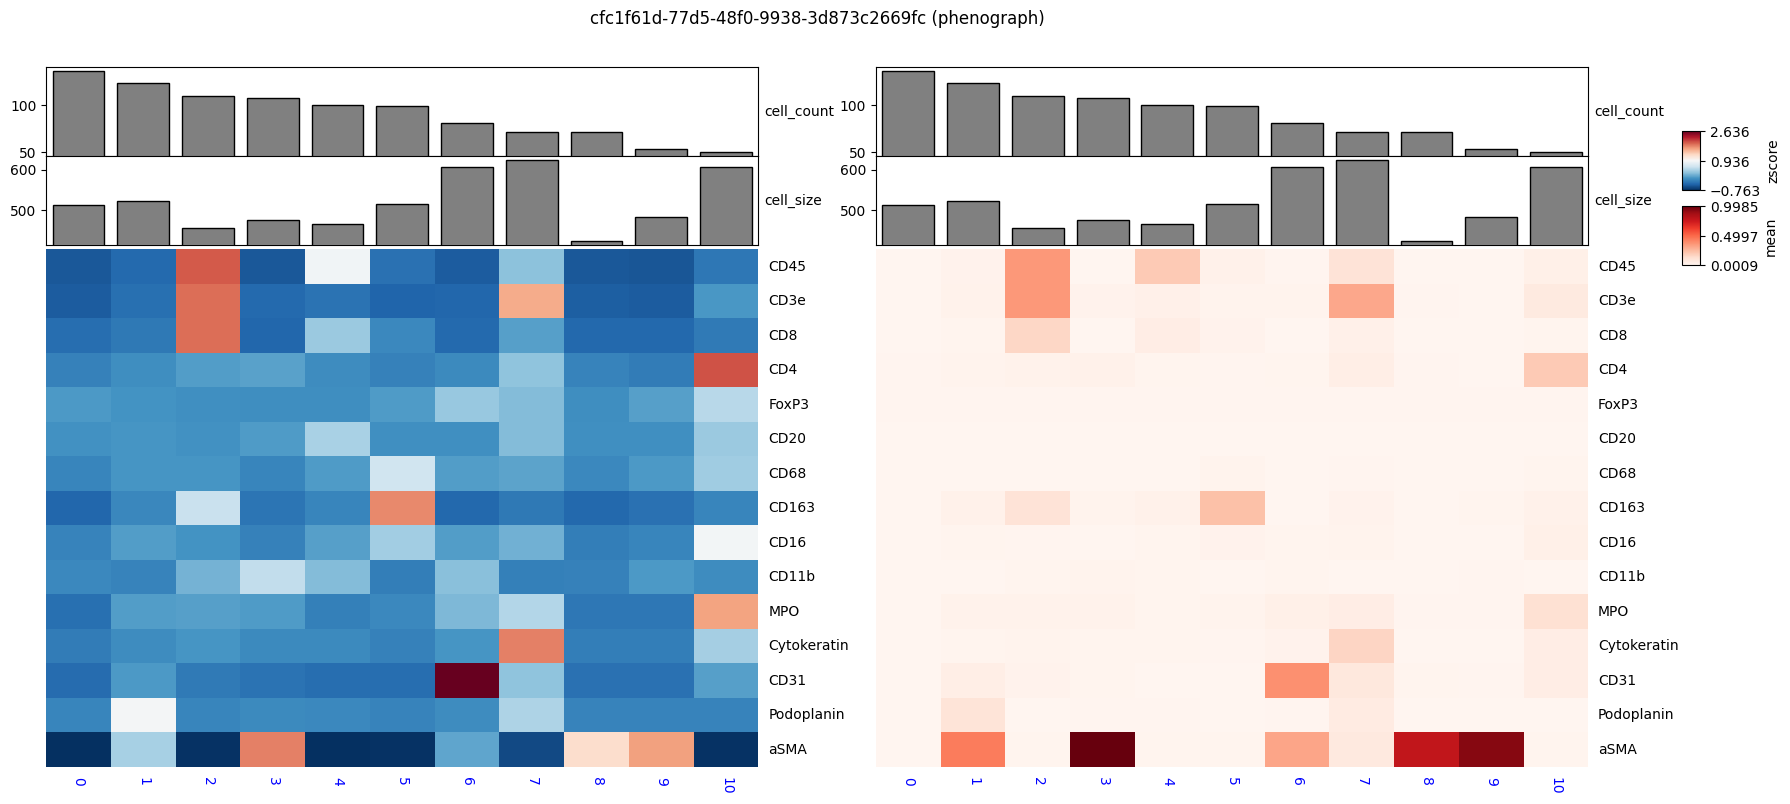

In [9]:
# plot heatmap without value limit
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
)

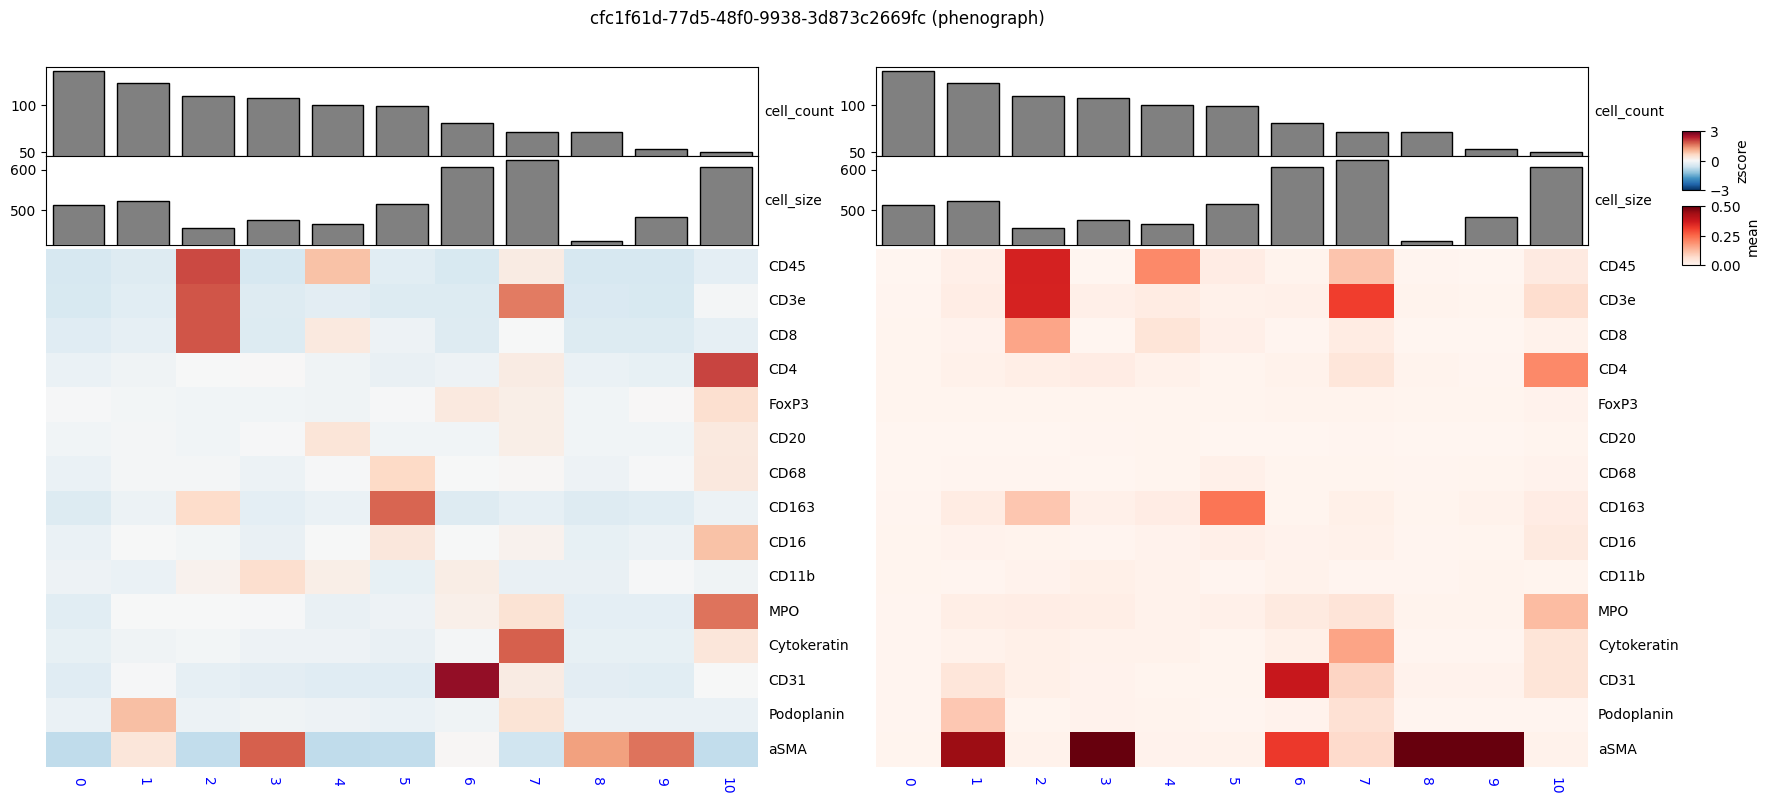

In [10]:
# plot heatmap with value limit, and turn off column clustering
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)

In [11]:
# check whether cells of a core are involved in the clustering
pattern = "RCC-TMA609(reg_4x5)-dst=reg019-src=reg005"
n_match = len([unit_id for unit_id in clustering_result.unit_ids if pattern in unit_id])
if n_match > 0:
    print(f"Found {n_match} units for {pattern} in this clustering")
else:
    print(f"No unit found for pattern '{pattern} in this clustering")

Found 1000 units for RCC-TMA609(reg_4x5)-dst=reg019-src=reg005 in this clustering


In [12]:
# generate geojson to visualize the clustering result
geojson_file = Path(
    "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/20250324_update_geojson_R/geojson/RCC-TMA609(reg_4x5)-dst=reg019-src=reg005.geojson"
)
update_geojson_from_clustering_result(geojson_file, clustering_result, output_dir)


/mnt/nfs/home/wenruiwu/projects/subclustering/.venv/lib/python3.13/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


Skipped 0 geometries: 


In [13]:
# for explicit clusters, add annotation
# units with annotation will be skipped for next clustering
clustering_result.add_annotation(
    {
        "0": "Toss",
        "1": "Muscle-like",
        "3": "Muscle-like",
        "4": "M",
        "5": "T",
        "6": "Endothelial",
        "7": "Muscle-like",
        "9": "Muscle-like",
    },
)

# for non-explicit clusters, it is recommended to add tag
# tag will be helpful for selecting units for next clustering
clustering_result.add_tag(
    {"2": "T_M", "8": "T_Other", "10": "T_M"},
    tag_name="tag",
)

In [14]:
# If you need to leave and want to continue later, you can stash the clustering result temporarily
clustering_result.stash(output_dir=output_dir)

To reload the stashed clustering result:
ClusteringResult.pop(
    clustering_id='cfc1f61d-77d5-48f0-9938-3d873c2669fc',
    output_dir='/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo'
)


In [15]:
# After stashing, you can pop the clustering result
clustering_result = ClusteringResult.pop(
    clustering_id="cfc1f61d-77d5-48f0-9938-3d873c2669fc",
    output_dir="/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo",
)

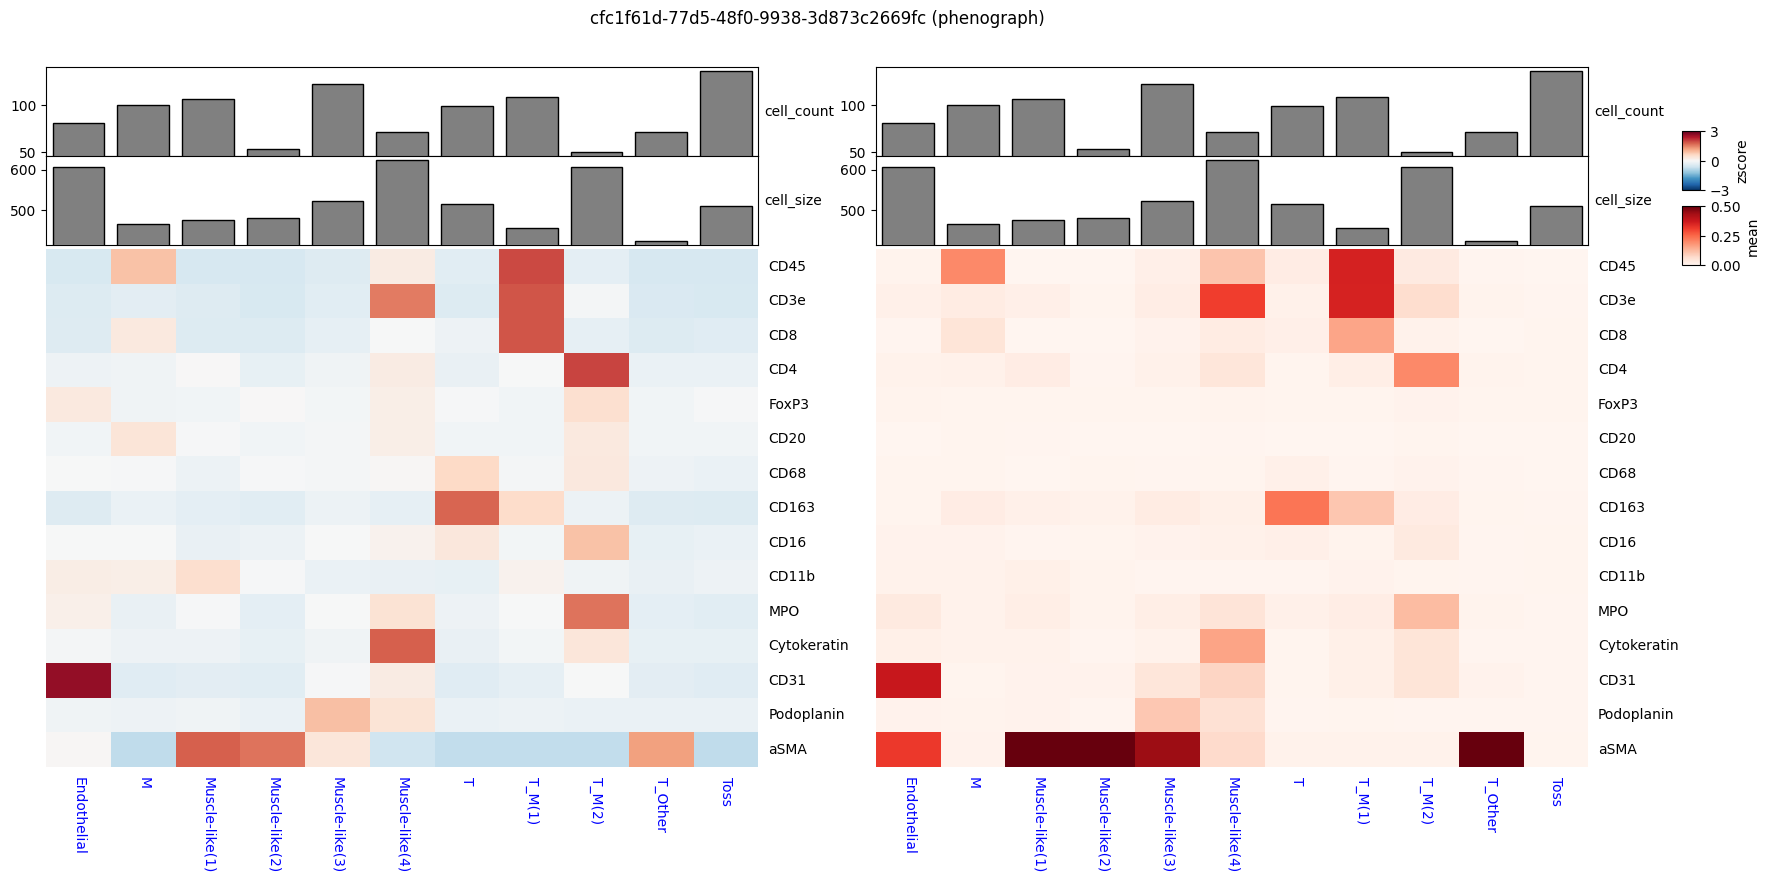

In [16]:
# plot heatmap with updated annotations and tags
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [17]:
# save the clustering result if the annotation and tag are correct
clustering_result.save(output_dir)

# Subclustering 1

In [18]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# summary of clustering results
manager.summary_df

Processing tags: 100%|██████████████████████████████| 1/1 [00:00<00:00, 274.93it/s]


,annotation,clustering_id,tag
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,T,cfc1f61d-77d5-48f0-9938-3d873c2669fc,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,Muscle-like,cfc1f61d-77d5-48f0-9938-3d873c2669fc,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,Muscle-like,cfc1f61d-77d5-48f0-9938-3d873c2669fc,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,,,T_Other
...,...,...,...
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1750,Toss,cfc1f61d-77d5-48f0-9938-3d873c2669fc,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1751,Toss,cfc1f61d-77d5-48f0-9938-3d873c2669fc,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,Muscle-like,cfc1f61d-77d5-48f0-9938-3d873c2669fc,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1753,,,T_M


In [19]:
# cells with no annotation need to be subclustered
manager.non_explicit_df

# tag will be helpful for selecting units for next clustering
manager.non_explicit_df.tag.value_counts()

# select units for next clustering
unit_ids = manager.non_explicit_df.query("tag == 'T_M'").index
unit_ids

,annotation,clustering_id,tag
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,,,T_Other
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c13,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c14,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c17,,,T_M
...,...,...,...
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1697,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1706,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1730,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1736,,,T_M


tag
T_M        159
T_Other     71
Name: count, dtype: int64

Index(['RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c13',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c14',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c17',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c25',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c27',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c30',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c36',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c37',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c65',
       ...
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1491',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1514',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1521',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1538',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1663',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1697',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1706',
       'RCC-TMA609(reg_4

In [20]:
# clustering using phenograph with T and Macrophage markers
clustering_result = run_clustering(
    adata,
    unit_ids,
    features=markers_t + markers_m,
    method="phenograph",
    method_params={"k": 50, "n_jobs": 8},
    output_dir=output_dir,  # automatically stash the clustering result at clustering
)
# clustering_result = ClusteringResult.from_csv("output/clustering_demo/clustering_results/adcb6652-72f1-4460-81d1-c78cf01c6429.csv")

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.013269662857055664 seconds
The bug has been fixed
Jaccard graph constructed in 0.09720802307128906 seconds
Wrote graph to binary file in 0.0035271644592285156 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.415967
After 2 runs, maximum modularity is Q = 0.423211
Louvain completed 22 runs in 0.1018059253692627 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.5108218193054199 seconds
To reload the stashed clustering result:
ClusteringResult.pop(
    clustering_id='57dea970-8517-4ccb-a342-67bc006d4e46',
    output_dir='/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo'
)


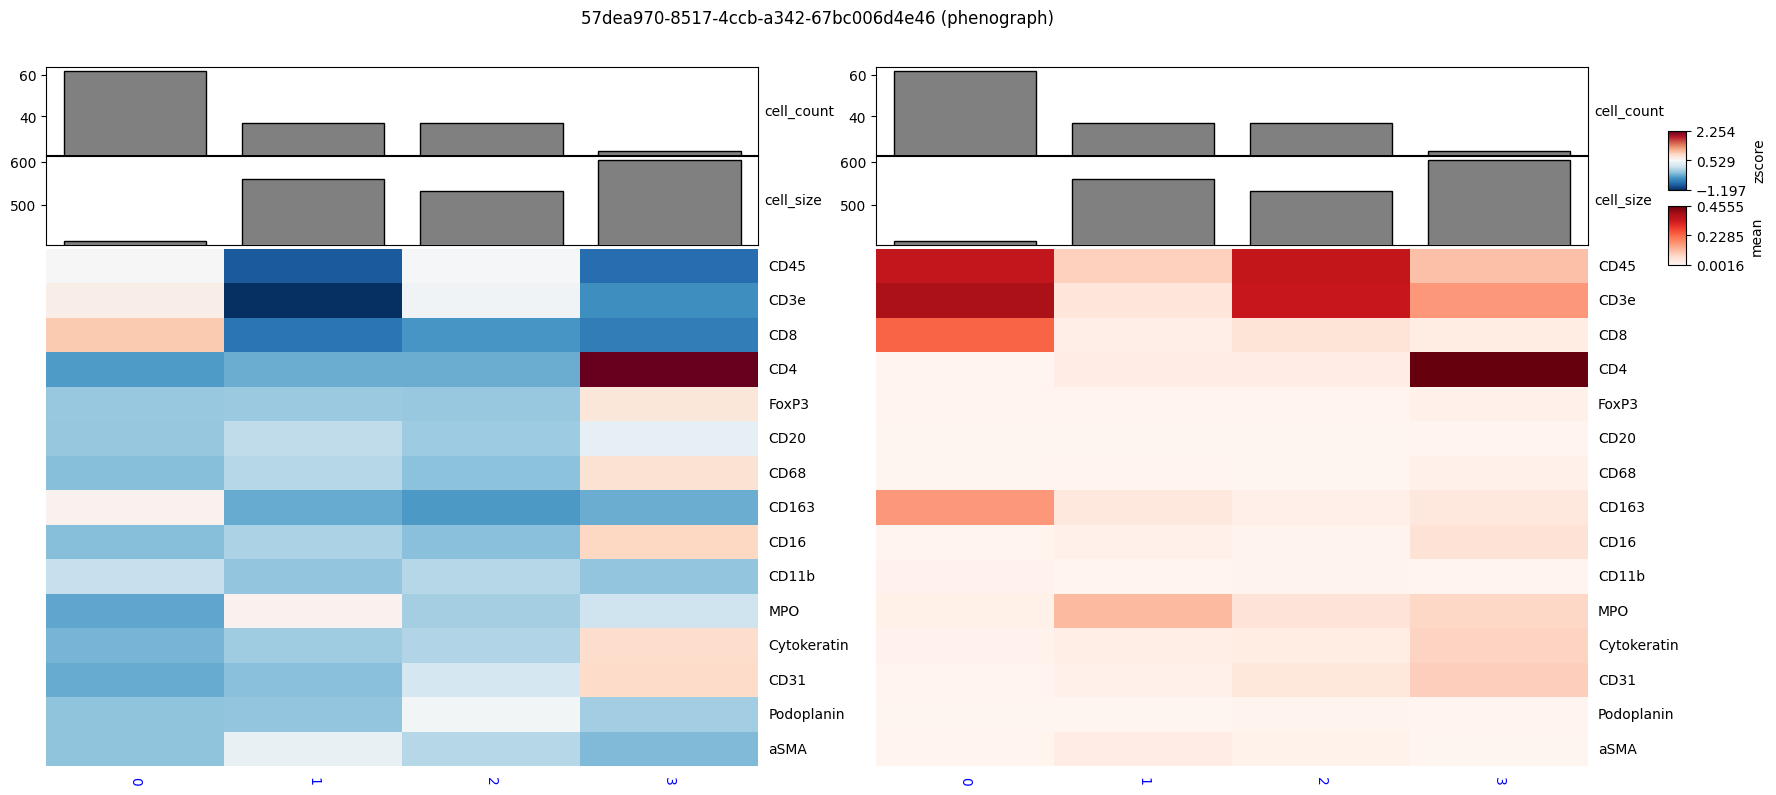

In [21]:
# plot heatmap without value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
)


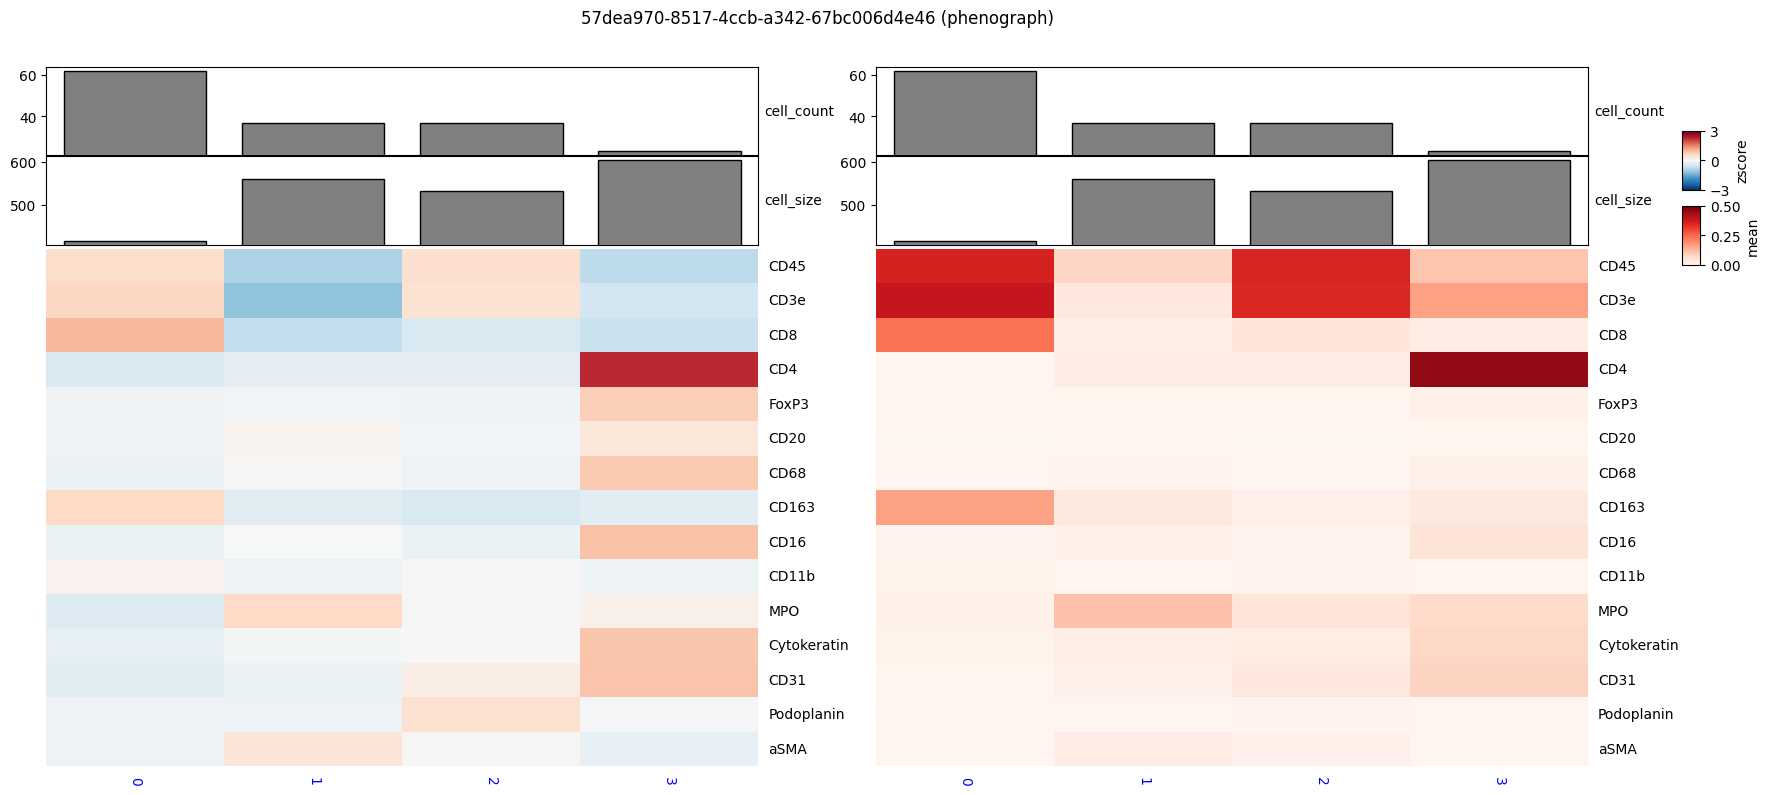

In [22]:
# plot heatmap with value limit
features = markers_all
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [23]:
# add annotation
clustering_result.add_annotation(
    {"0": "CD8T", "1": "Neutrophil", "2": "CD8T", "3": "CD4T", "4": "M"}
)

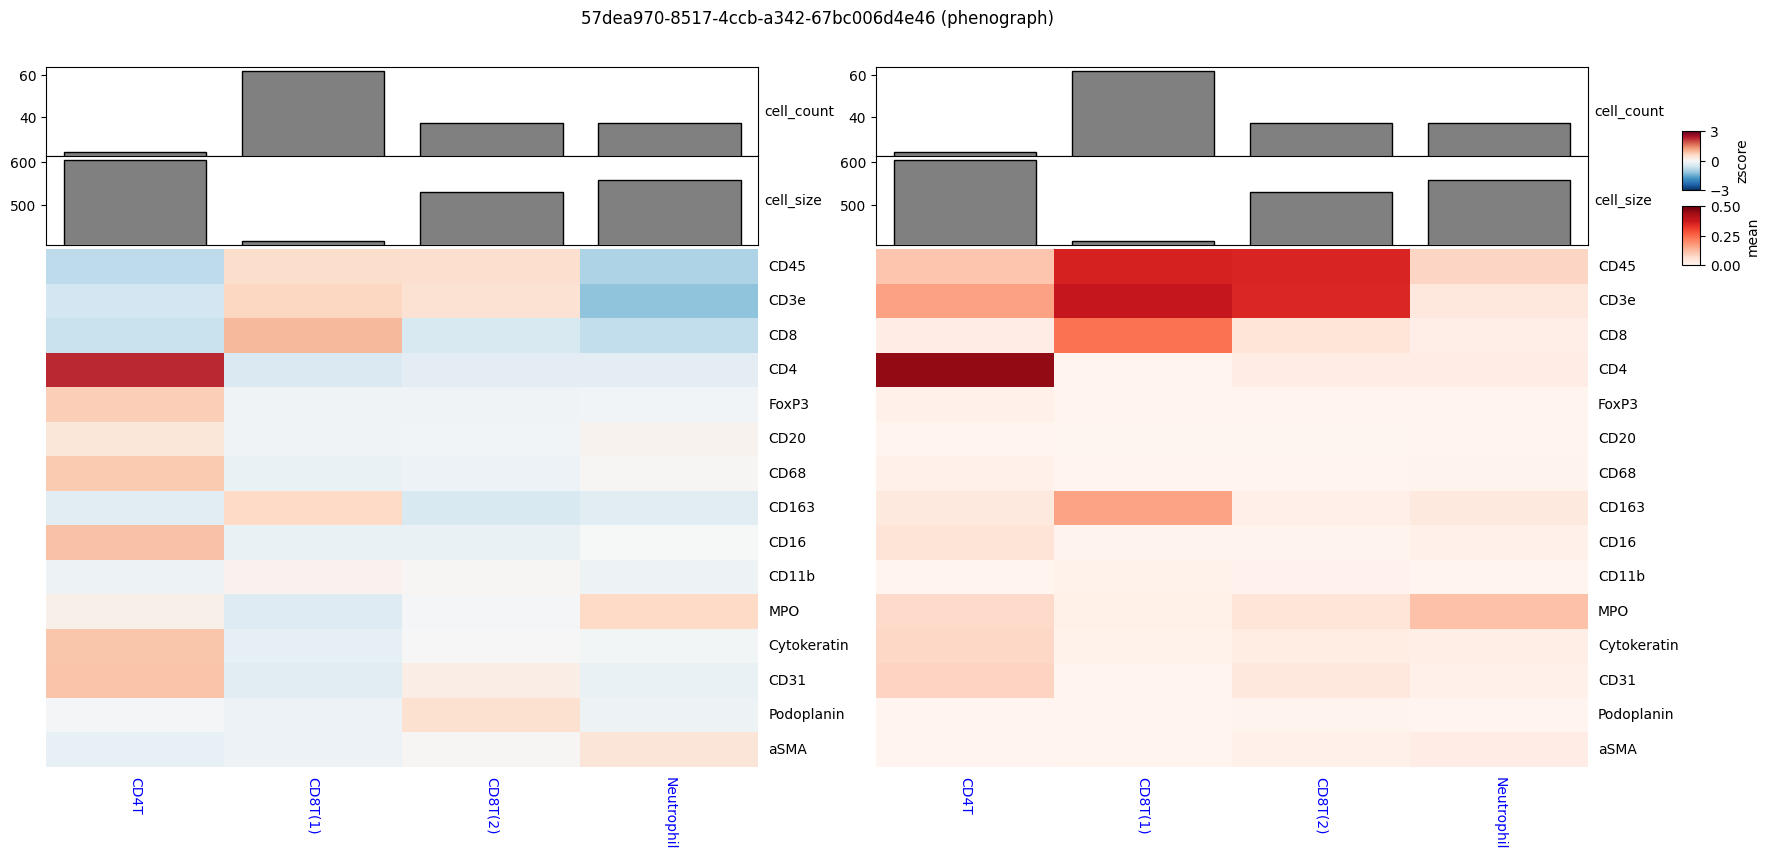

In [24]:
# plot heatmap with updated annotations
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="annotation",  # x_label can be "tag" or "annotation", if all units are annotated, use "annotation"
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)

In [25]:
# save the clustering result if the annotation and tag are correct
clustering_result.save(output_dir)

# Subclustering 2

In [26]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# cells with no annotation need to be subclustered
len(manager.non_explicit_df)
manager.non_explicit_df.tag.value_counts()

# select units for next clustering
unit_ids = manager.non_explicit_df.query("tag == 'T_Other'").index
unit_ids

Processing tags: 100%|██████████████████████████████| 1/1 [00:00<00:00, 243.37it/s]


71

tag
T_Other    71
Name: count, dtype: int64

Index(['RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c132',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c143',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c238',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c296',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c303',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c376',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c392',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c402',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c418',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c419',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c436',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c439',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c454',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c455',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c470',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c485',
       'RCC-TMA609(reg_4x5)-dst=r

In [27]:
# clustering using phenograph with T and B markers
clustering_result = run_clustering(
    adata,
    unit_ids,
    features=markers_nonimmune,
    method="phenograph",
    method_params={"k": 10, "n_jobs": 8},
    output_dir=output_dir,  # automatically stash the clustering result at clustering
)


Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.013123273849487305 seconds
The bug has been fixed
Jaccard graph constructed in 0.08251237869262695 seconds
Wrote graph to binary file in 0.0009713172912597656 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.681451
After 3 runs, maximum modularity is Q = 0.683286
Louvain completed 23 runs in 0.09524917602539062 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.4882924556732178 seconds
To reload the stashed clustering result:
ClusteringResult.pop(
    clustering_id='8586eb88-e7a6-4bb1-96eb-6ad64194e2e6',
    output_dir='/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo'
)


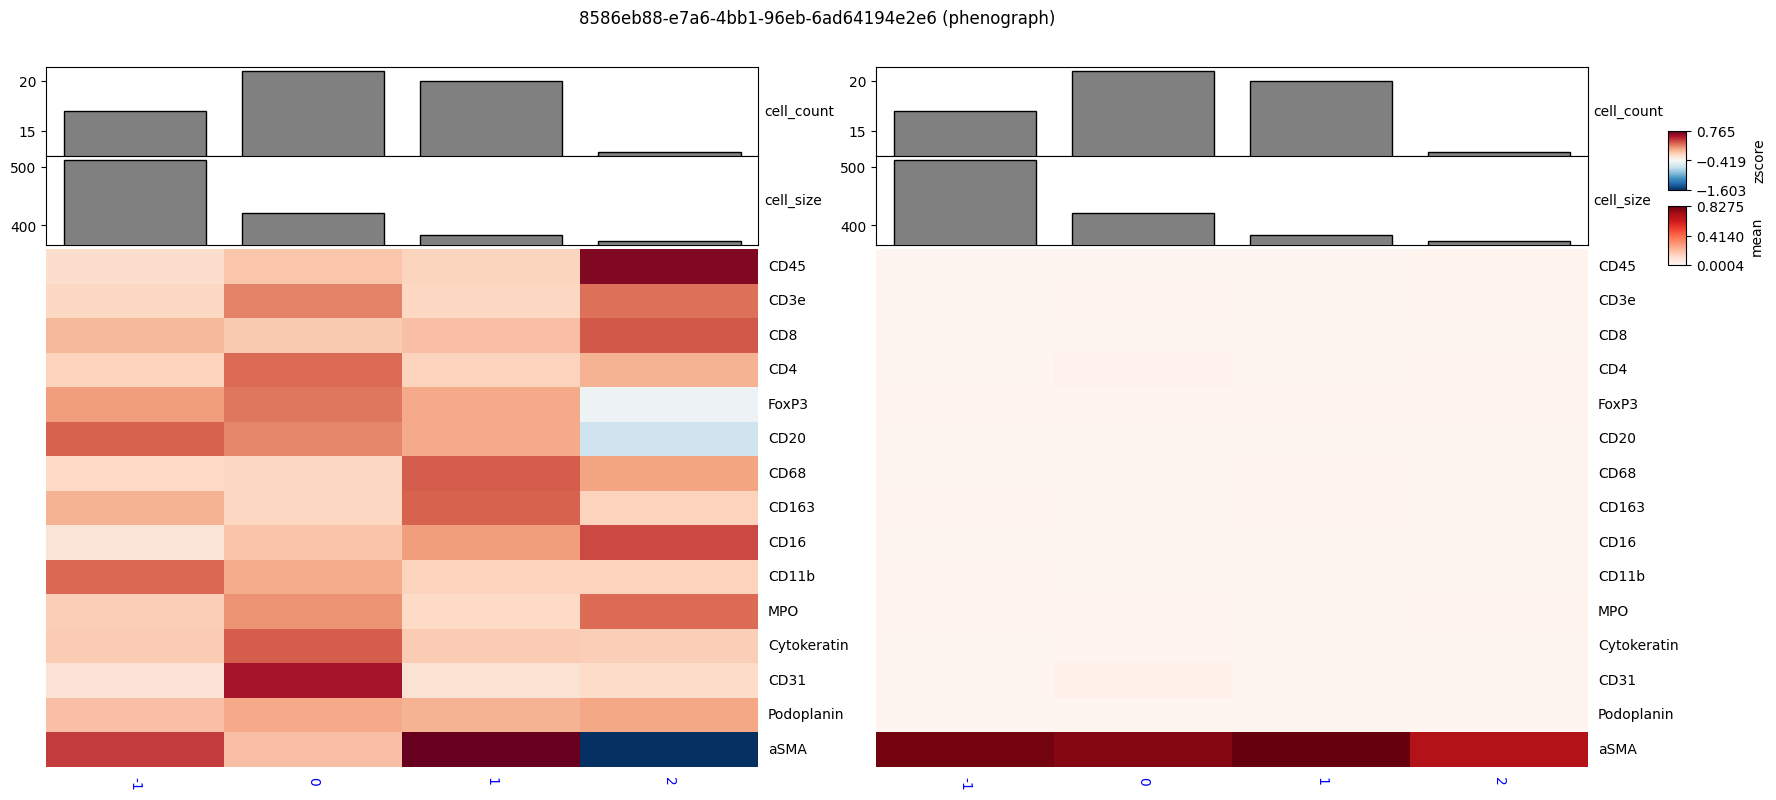

In [28]:
# plot heatmap without value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
)


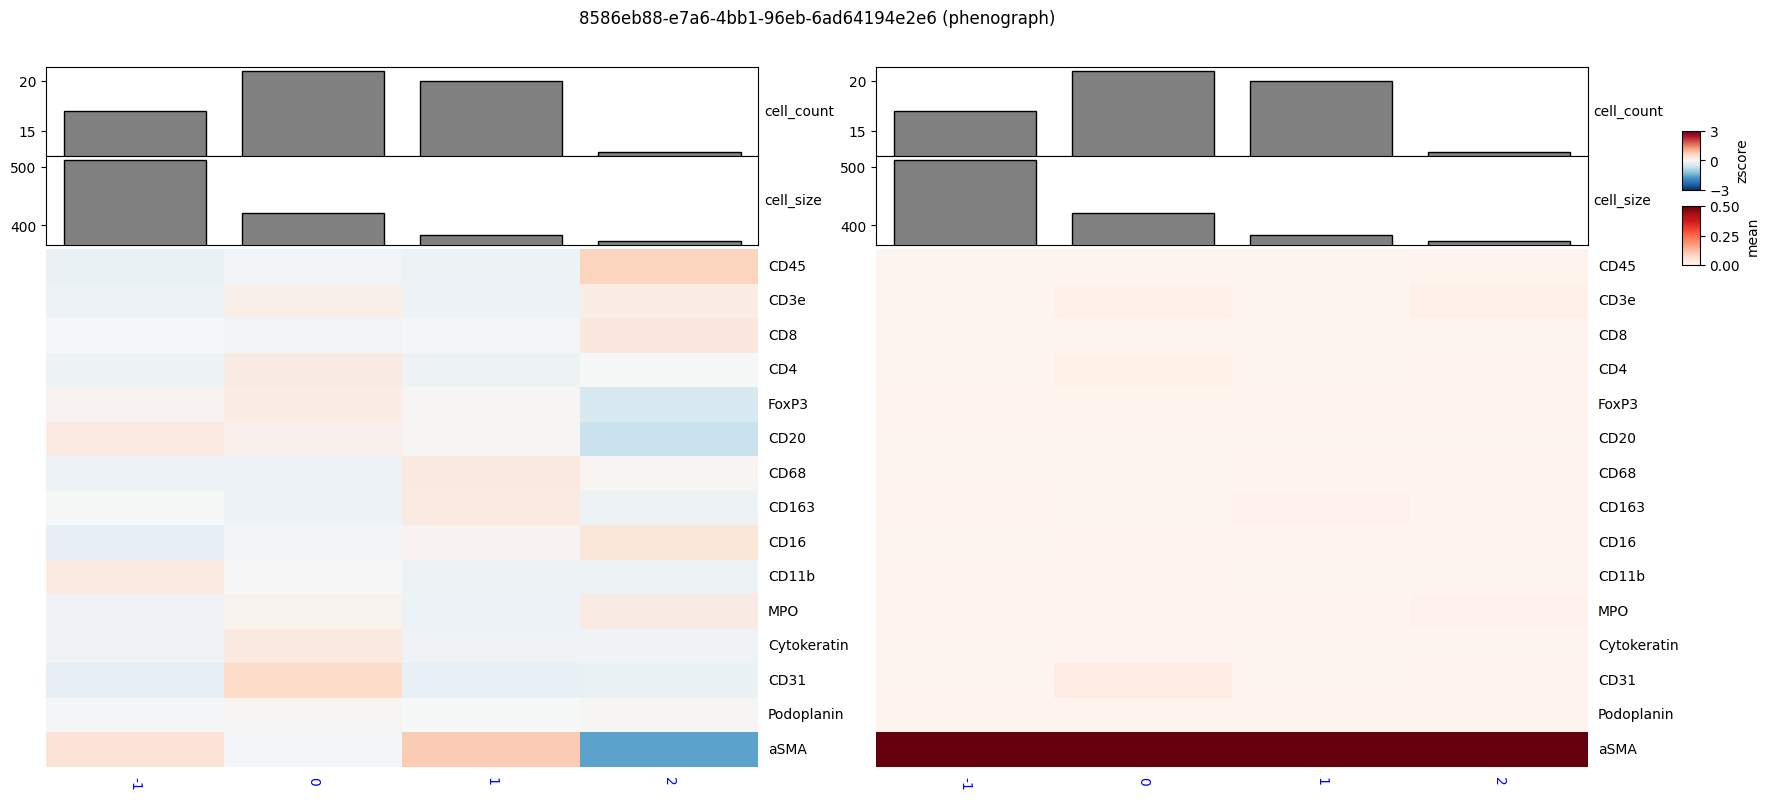

In [29]:
# plot heatmap with value limit
features = markers_all
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [30]:
# add annotation and tag
clustering_result.add_annotation(
    {"0": "T", "1": "CD8T", "2": "Other"}
)

clustering_result.add_tag(
    {"3": "T_Other"},
    tag_name="tag_2", # you can use another tag name
)


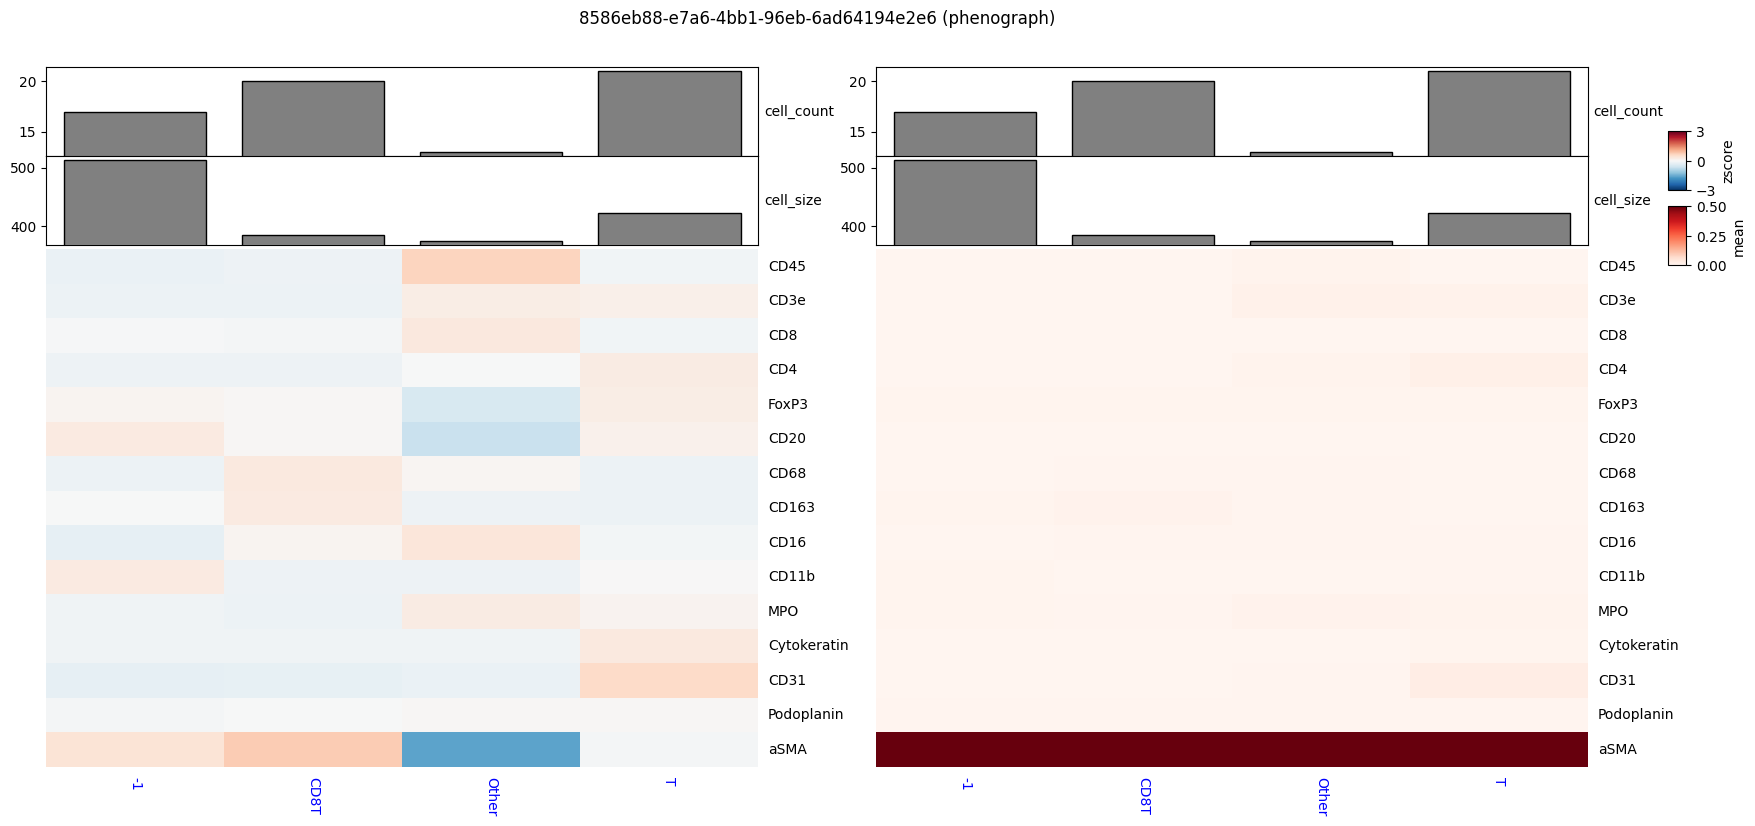

In [31]:
# plot heatmap with value limit
features = markers_all
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag_2",
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [32]:
clustering_result.save(output_dir)

# Final Heatmap


In [33]:
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)
len(manager.non_explicit_df)

Processing tags: 100%|██████████████████████████████| 2/2 [00:00<00:00, 458.69it/s]


17

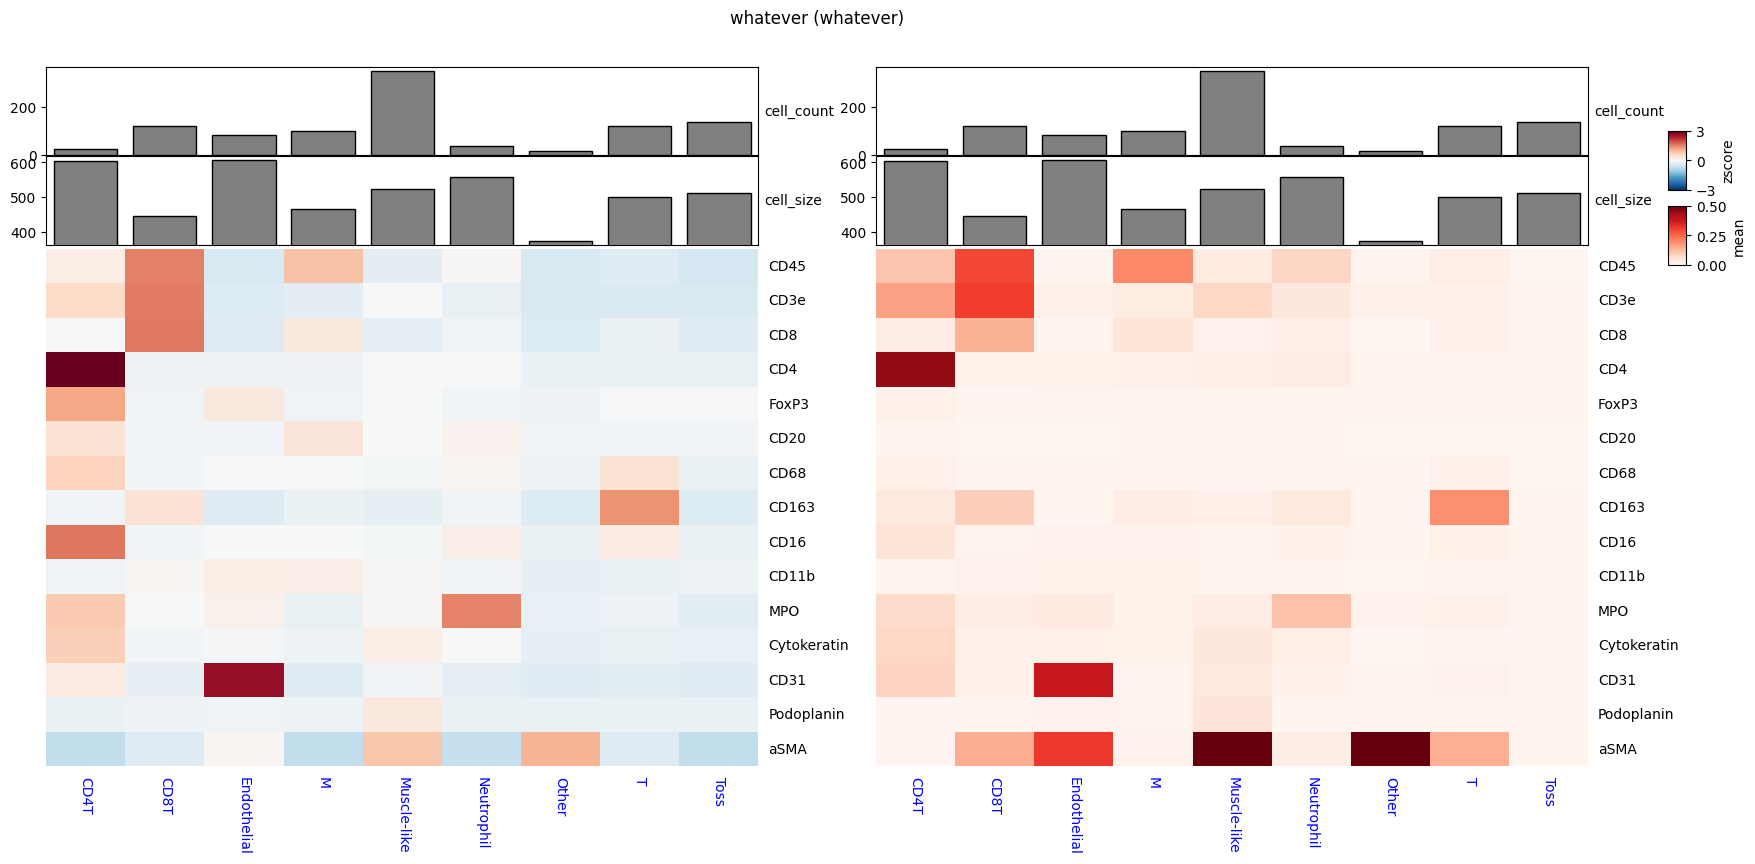

In [34]:
idx_annotated = manager.summary_df.annotation != ""
result = ClusteringResult(
    clustering_id="whatever",
    method="whatever",
    unit_ids=manager.summary_df.index[idx_annotated],
    cluster_ids=manager.summary_df.annotation[idx_annotated],
)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    result,
    features,
    figsize=(20, 8),
    x_label="annotation",
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)
